In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
#### Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
#### FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

Abstract: The dataset includes 244 instances that regroup a data of two regions of Algeria.

Data Set Characteristics:  Multivariate

Number of Instances: 244

Number of Attributes: 12

Associated Tasks: Classification, Regression

Missing Values? N/A

Attribute Characteristics: Real

Area: Life

Number of Web Hits: 56212

Date Donated: 2019-10-22

In [2]:
# Creating Algerian_forest_fires_dataset_UPDATE datasets dataframe as df 

df = pd.read_csv('C:/Users/sssun/Downloads/data fsds/Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
# Shape of the dataframe

df.shape

(246, 14)

In [5]:
# All columns of the dataframe

df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
# Information about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
# Copy the dataframe

df1 =df.copy()

In [6]:
# There is two unnessecery(empty) row in this dataframe at index no. 122 and 123. 
# For removing 122 and 123 index from dataframe

df1 = df1.drop(index=[122,123], axis=0)

In [7]:
# Creating a new region column where '1' is for Bejaia Region and '0' is for Sidi-Bel Abbes Region 

region = []
for i in range(244):
    if i < 122:
        region.append(1)
    else:
        region.append(0)

df1['Region'] = region

In [8]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Observation from columns : There is space in some columns

In [9]:
# Removing left and right space from columns

df1.columns = [i.strip() for i in df1.columns]
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
# Removing left and right space from Classes column

df1.Classes = df1.Classes.str.strip()

In [11]:
# For getting unique values of Classes column

df1['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [12]:
# Replacing nan with mode value

df1.replace('nan', df1['Classes'].mode(), inplace=True)

In [13]:
# For replacing fire value as 1 and not fire value as 0 from Classes column

df1['Classes']= df1['Classes'].apply(lambda x: 0 if x == 'not fire' else 1)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    int64 
 14  Region       244 non-null    int64 
dtypes: int64(2), object(13)
memory usage: 30.5+ KB


In [15]:
# For changing the datatype of columns

#df1.apply(pd.to_numeric)
#Getting ValueError: Unable to parse string "14.6 9" at position 165

df1.iloc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes              1
Region               0
Name: 167, dtype: object

In DC column '14.6 9' has a space between 6 and 9. And because of this it's giving Error.


In [16]:
#For fixing this error we can replce ' '(space) by ''

df1['DC'] = df1['DC'].str.replace(' ', '')

In [17]:
df1.iloc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC               14.69
ISI               12.5
BUI               10.4
FWI            fire   
Classes              1
Region               0
Name: 167, dtype: object

In [18]:
# df1 = df1.apply(pd.to_numeric)
# ValueError: Unable to parse string "fire   " at position 165

df1['FWI'].iloc[165]

'fire   '

In [19]:
# Checking the unique value of  FWI column

df1['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In FWI column all values are numeric but there is a categorical value (i.e - fire). Because of this categorical value it is not able to change the datatype.

In [20]:
# Replacing the fire value of FWI column

df1['FWI'].replace(to_replace= 'fire   ', value=None, inplace=True)

In [21]:
df1['FWI'].iloc[165]

'4.7'

In [22]:
# Changing datatype of columns

df1 = df1.apply(pd.to_numeric)

In [23]:
# Creating a new column 'Date'

df1['Date'] = pd.to_datetime(df1[['day', 'month', 'year']])

### After cleaning data

In [24]:
# The cleaned dataframe

df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0,2012-09-26
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0,2012-09-27
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0,2012-09-28
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0,2012-09-29


In [25]:
df1.shape

(244, 16)

In [26]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'Date'],
      dtype='object')

In [27]:
# For checking null values

df1.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
Date           0
dtype: int64

In [28]:
# Checking dtype and non-null value count of columns

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          244 non-null    int64         
 1   month        244 non-null    int64         
 2   year         244 non-null    int64         
 3   Temperature  244 non-null    int64         
 4   RH           244 non-null    int64         
 5   Ws           244 non-null    int64         
 6   Rain         244 non-null    float64       
 7   FFMC         244 non-null    float64       
 8   DMC          244 non-null    float64       
 9   DC           244 non-null    float64       
 10  ISI          244 non-null    float64       
 11  BUI          244 non-null    float64       
 12  FWI          244 non-null    float64       
 13  Classes      244 non-null    int64         
 14  Region       244 non-null    int64         
 15  Date         244 non-null    datetime64[ns]
dtypes: datet

In [29]:
# Statistical summury of the dataframe

df1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.025820,0.565574,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.426747,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [30]:
# For checkking memory usasge

df1.memory_usage()

Index          1952
day            1952
month          1952
year           1952
Temperature    1952
RH             1952
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
Region         1952
Date           1952
dtype: int64

### For exploring data

In [31]:
# defining categorical columns

categorical_col = [fea for fea in df1.columns if df1[fea].dtype == 'O']
categorical_col

[]

OBSERVATION : There is no categorical column in df1 dataframe

In [32]:
# defining numerical columns

numerical_col = [fea for fea in df1.columns if df1[fea].dtype != 'O']
numerical_col

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region',
 'Date']

In [33]:
#removing 'day', 'month', 'year' and 'date' from numerical_col list as they are datetime data
#removing 'Classes' and "Region" as they are categorical data

numerical_col.remove('day')
numerical_col.remove('month')
numerical_col.remove('year')
numerical_col.remove('Date')
numerical_col.remove('Classes')
numerical_col.remove('Region')

In [34]:
numerical_col

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [35]:
#adding 'classes' and  'Region' in categorical_col list

categorical_col.append('Classes')
categorical_col.append('Region')

In [36]:
categorical_col

['Classes', 'Region']

## Univariate Analysis

Univariate analysis is the simplest form of analyzing data. It is commonly used in statistics to describe a type of data which consists of observation on only a single characterstics or attribute.

#### Visualization of outliers using box plot

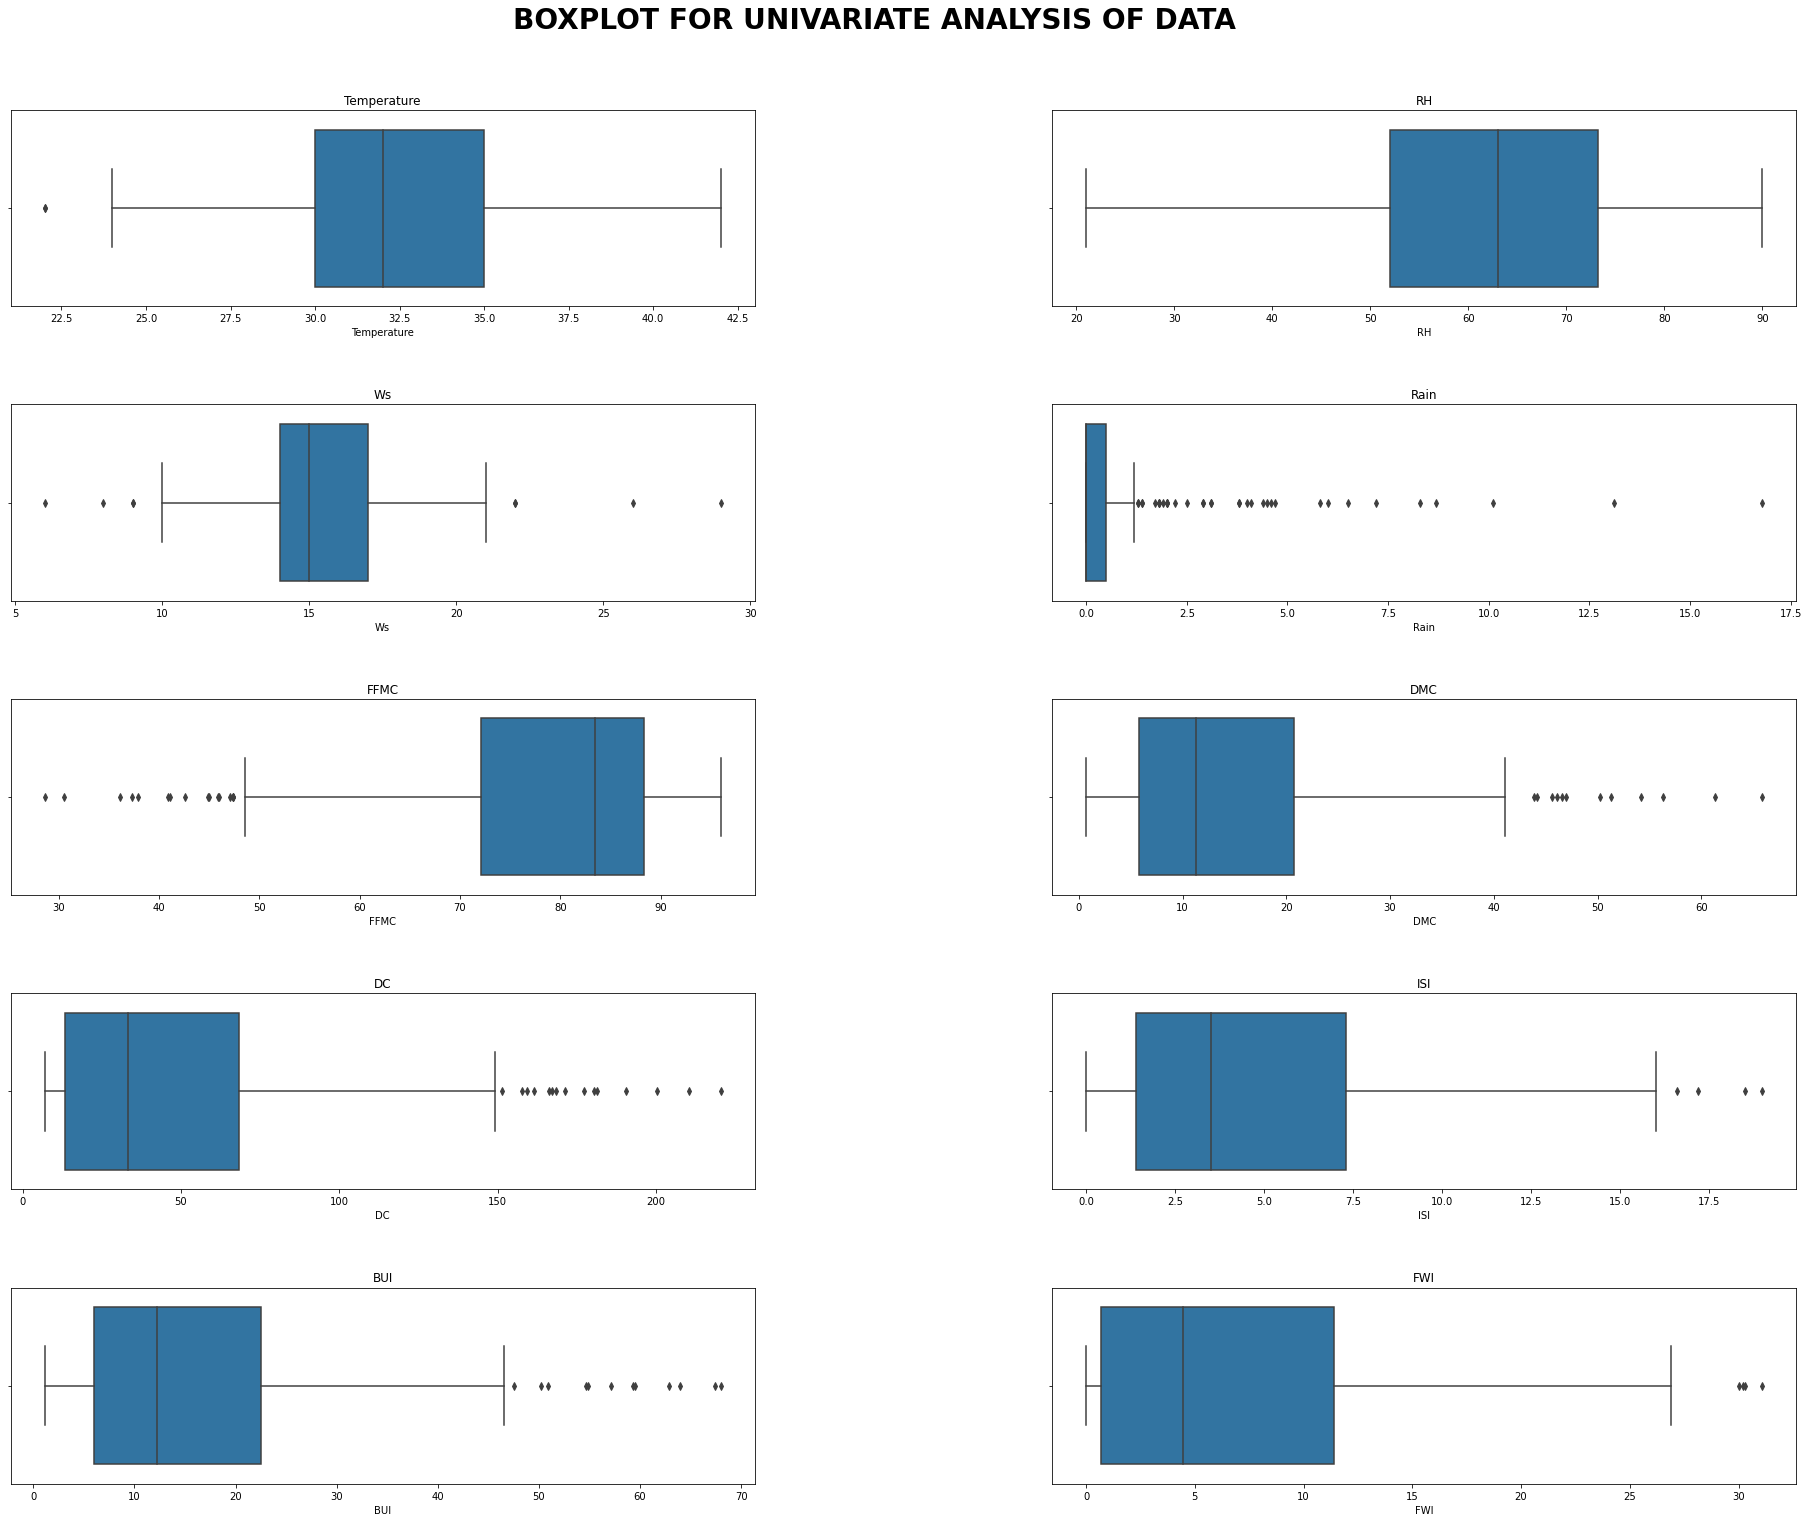

In [114]:
#create figure with 3 x 3 grid of subplots

fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.boxplot(data = df1, x=col);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

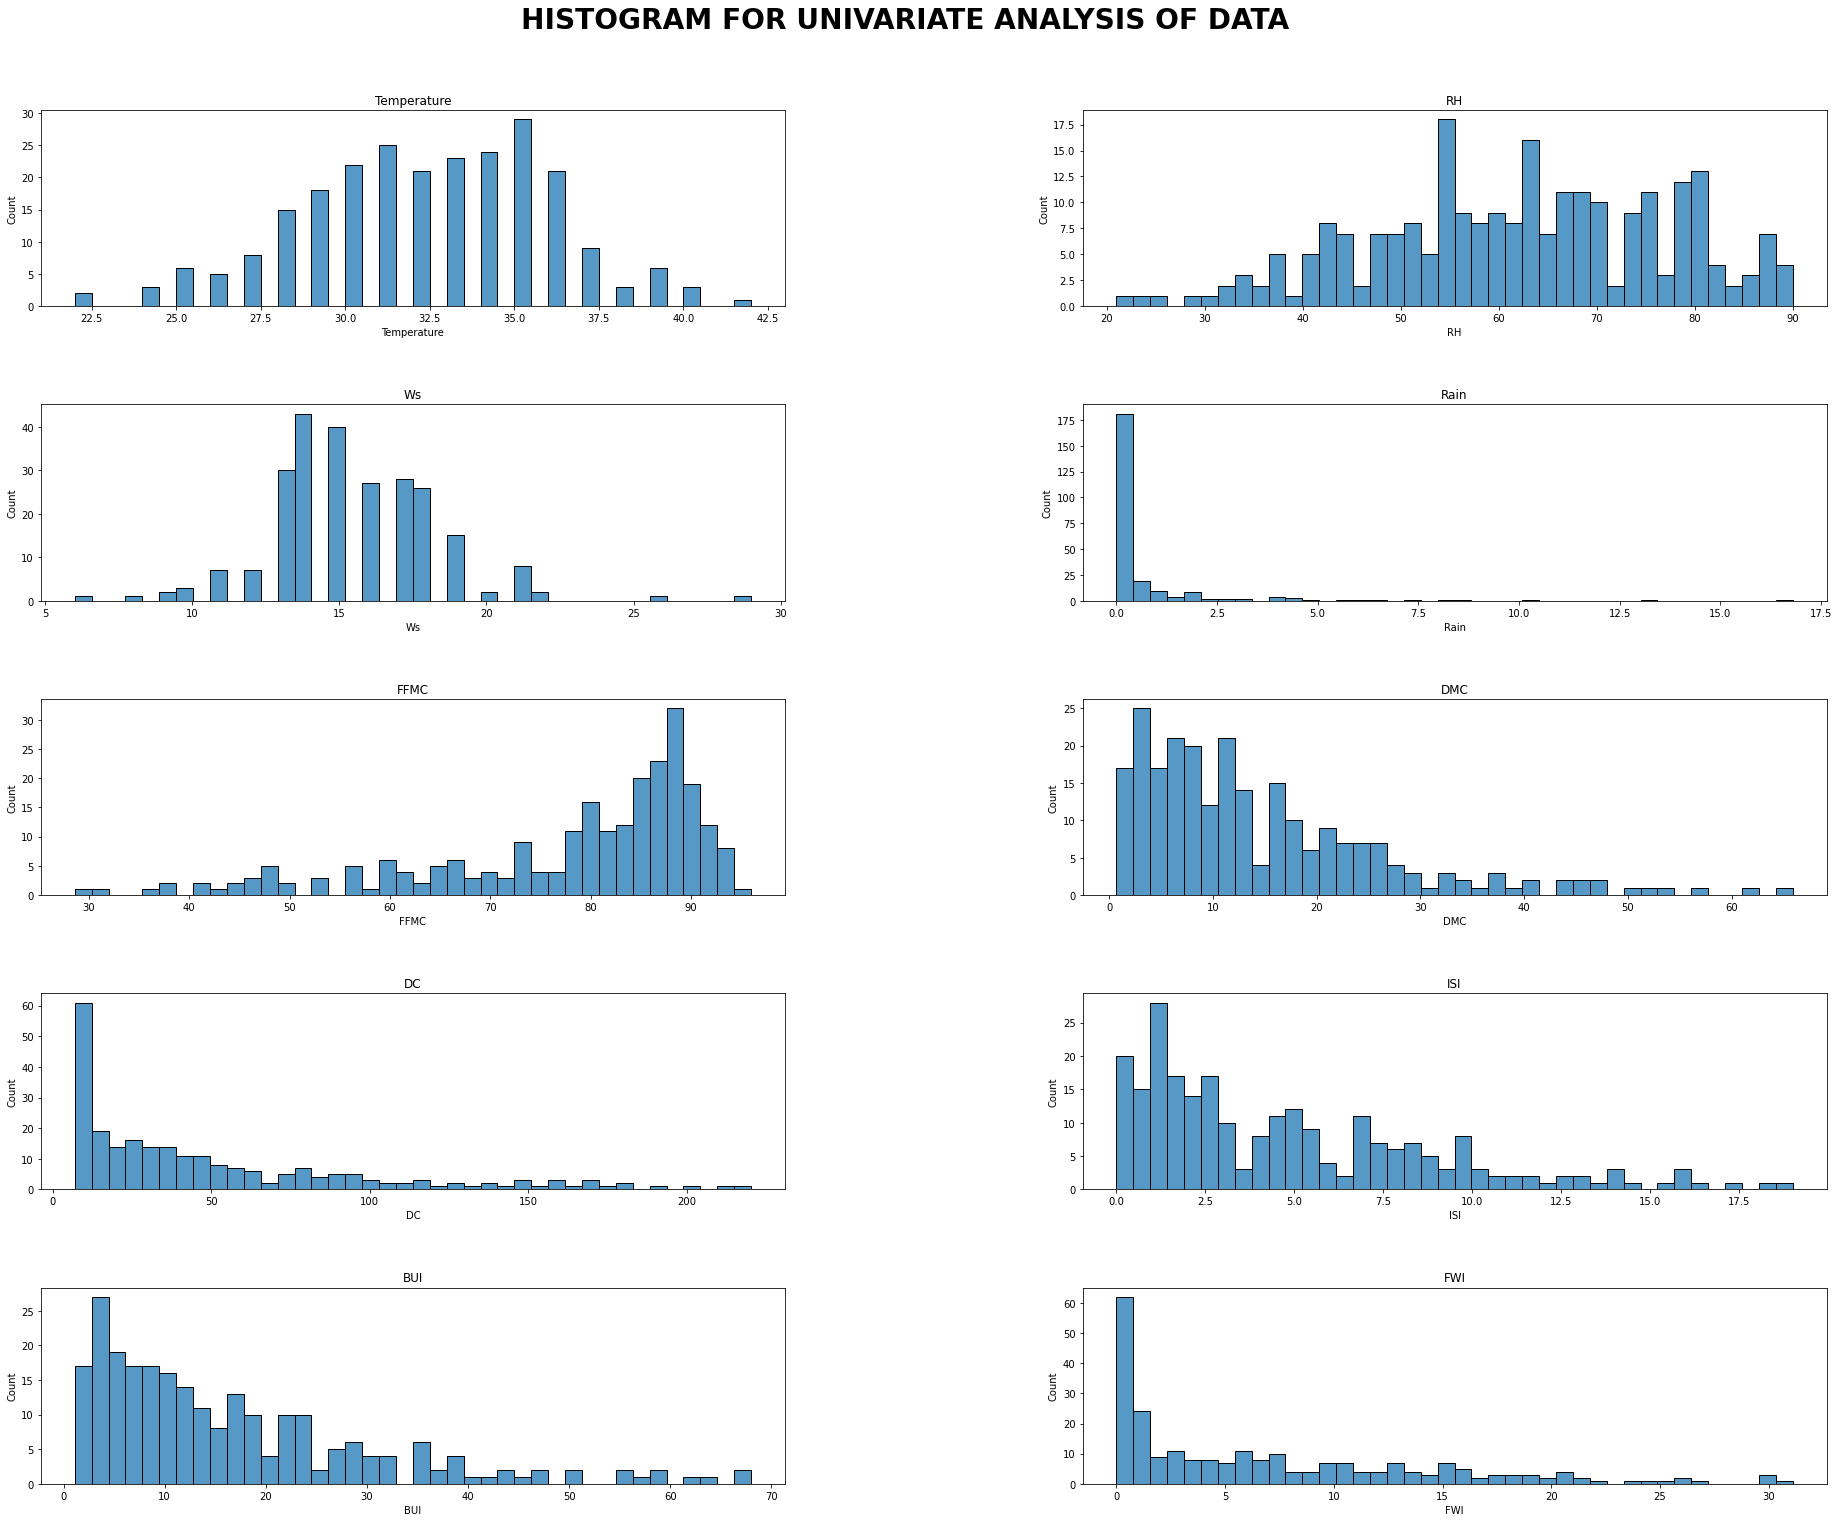

In [115]:
#create figure with 3 x 3 grid of subplots

fig = plt.figure(figsize=[32,24])
fig.suptitle('HISTOGRAM FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.histplot(data = df1, x=col, bins=40);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

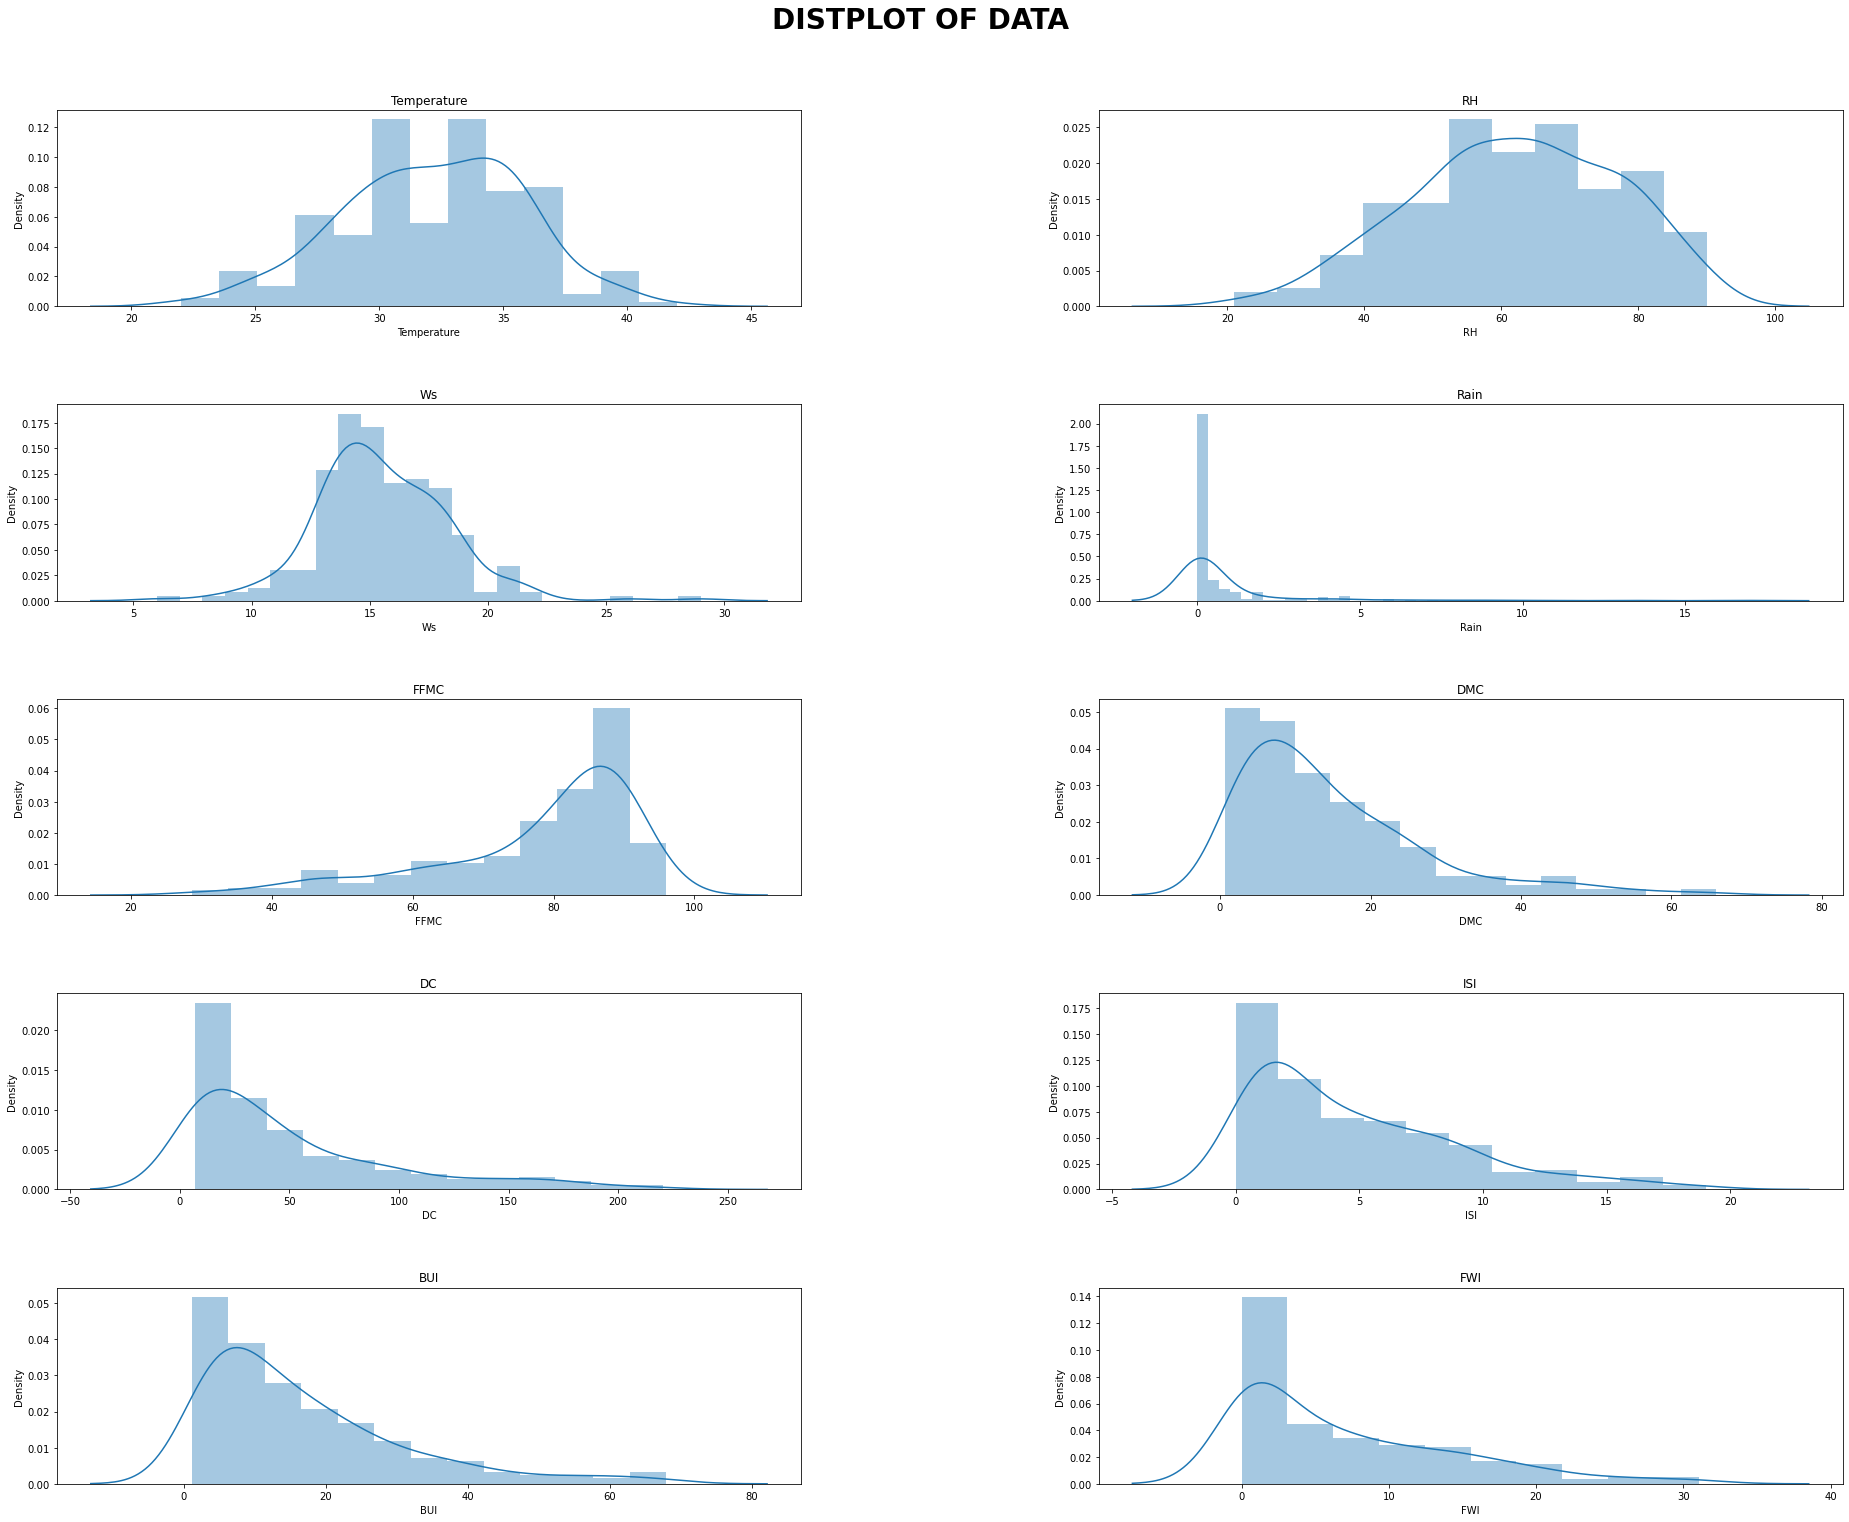

In [72]:
#create figure with 3 x 3 grid of subplots

fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical_col):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.distplot(df1[col]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

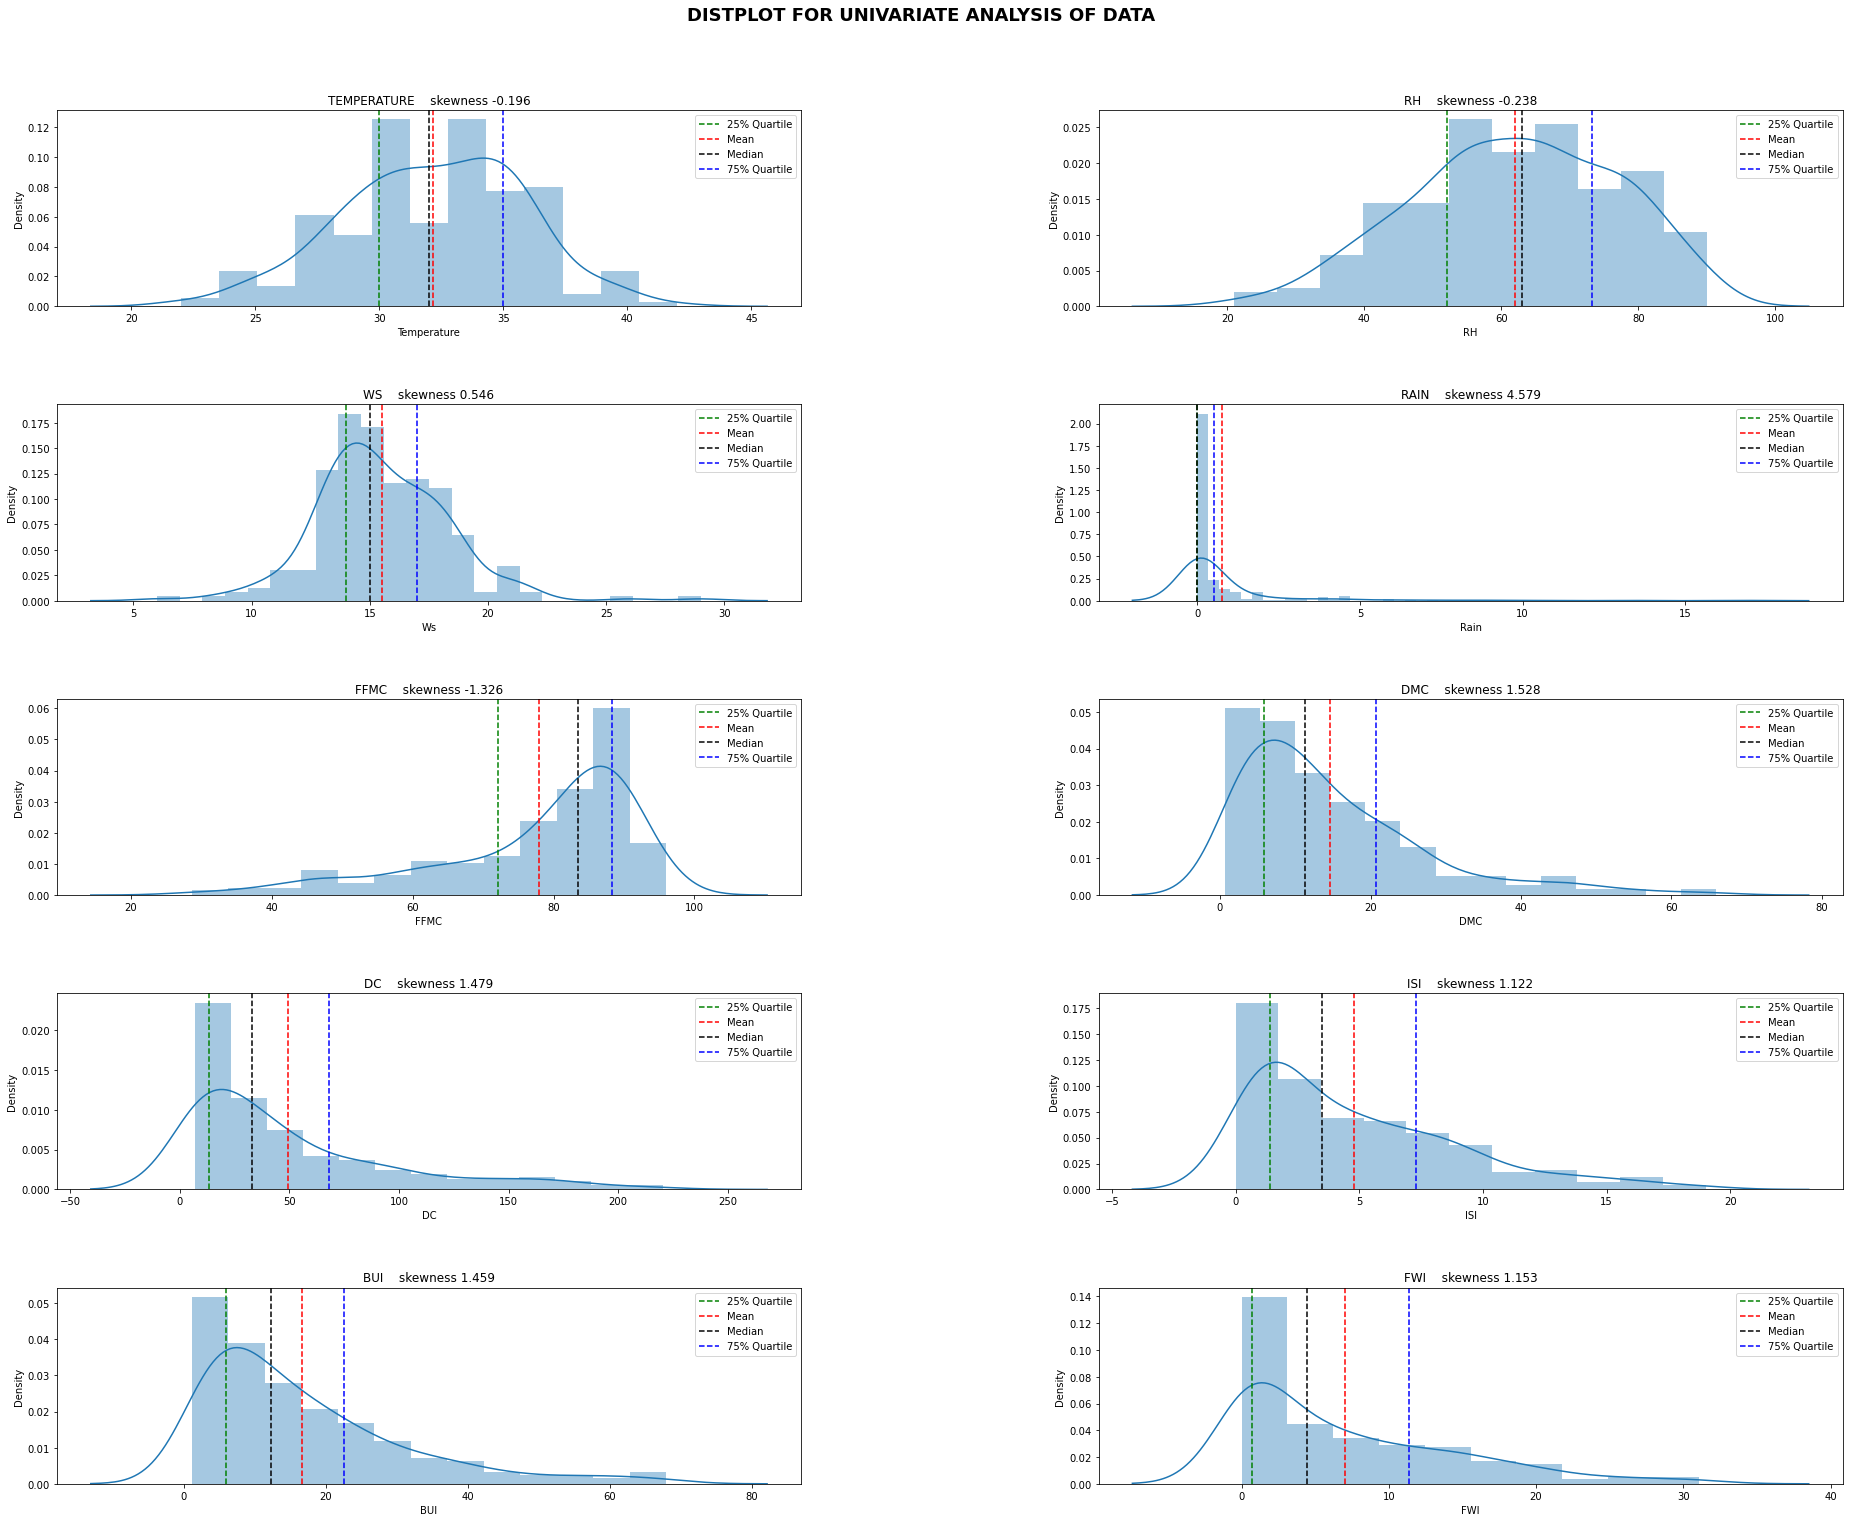

In [116]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical_col):
    ax = fig.add_subplot(5, 2, i+1)
    ax = sns.distplot(df1[col]) 
    ax.axvline(df1[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df1[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df1[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df1[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}    skewness {round(df1[col].skew(),3)}')
    ax.legend(fontsize=10) 

## Bivariant Analysis

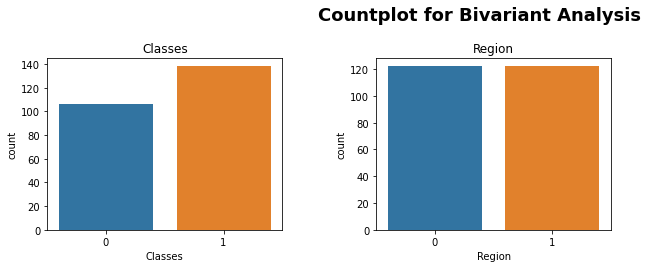

In [117]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Countplot for Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(categorical_col,1):
    a = fig.add_subplot(3, 3, i)
    a=sns.countplot(x = df1[col] , ax=a)
    a.set_title(col)
    #a.label(a.containers[0] , label_type='center') 
   #a.label(a.containers[1] , label_type='center')
    #a.legend(fontsize=10)

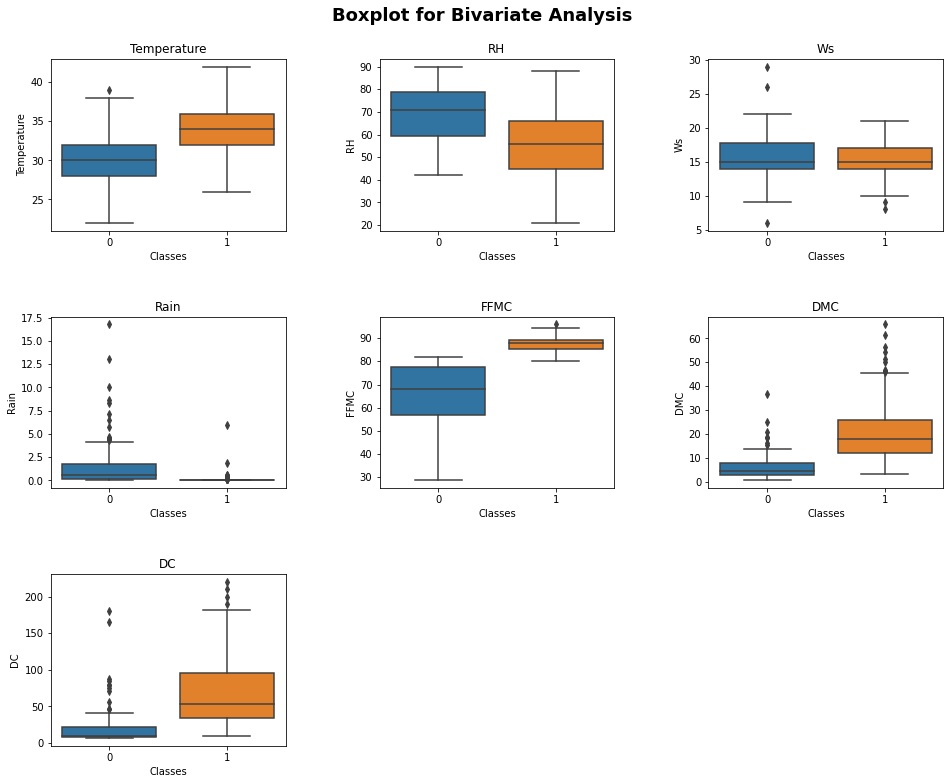

In [121]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Boxplot for Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numerical_col[0:7]):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.boxplot(x = 'Classes' , y =col , ax=a  , data = df1 )
    a.set_title(col)

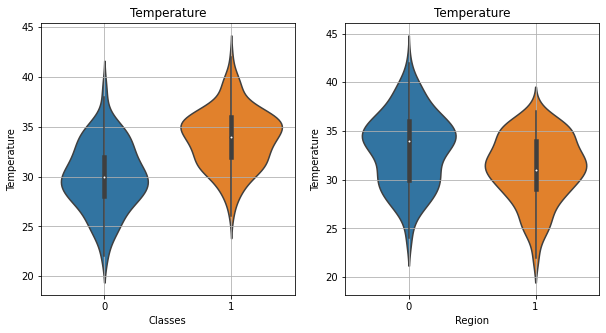

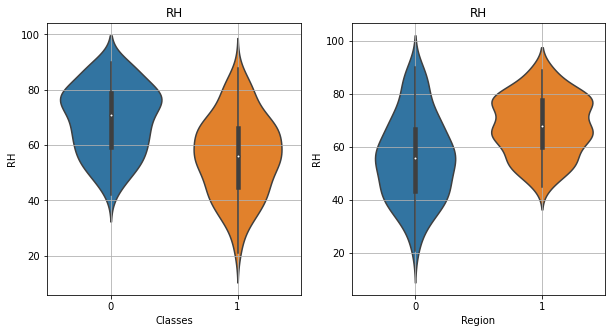

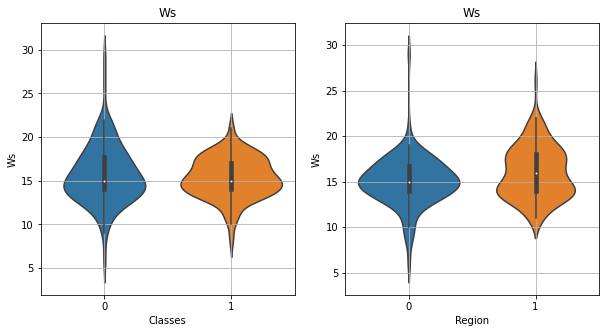

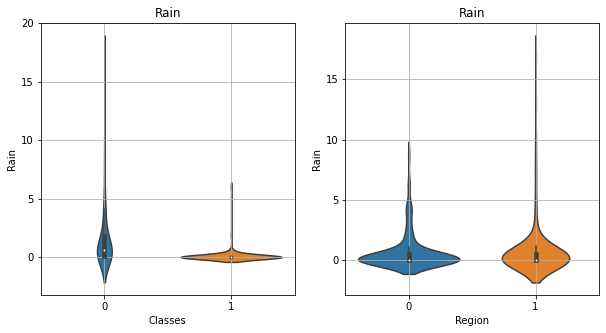

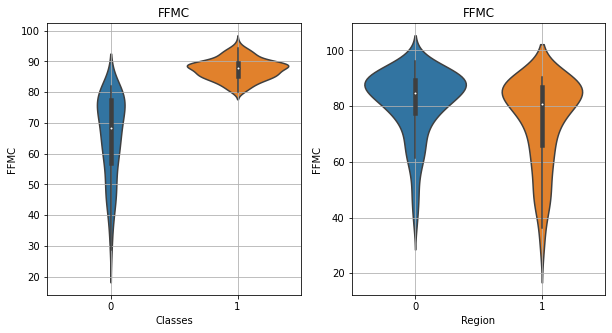

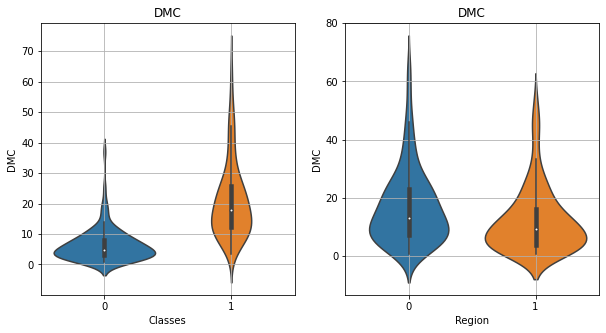

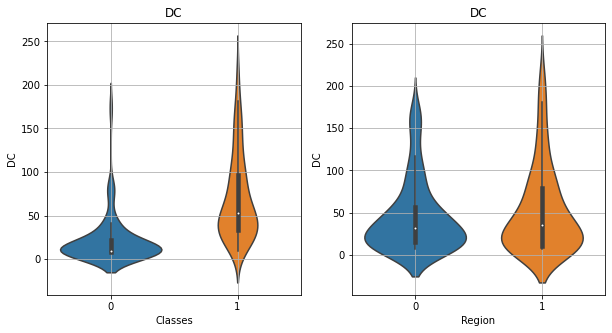

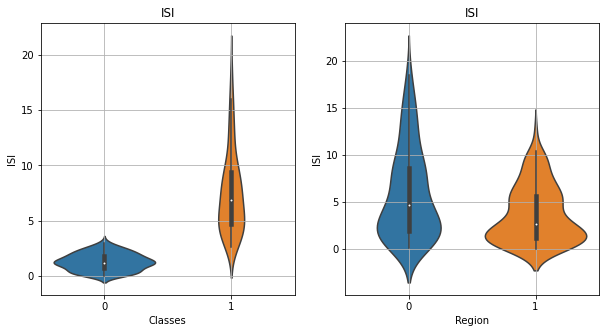

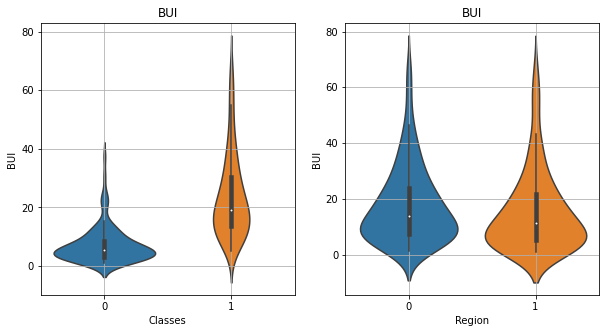

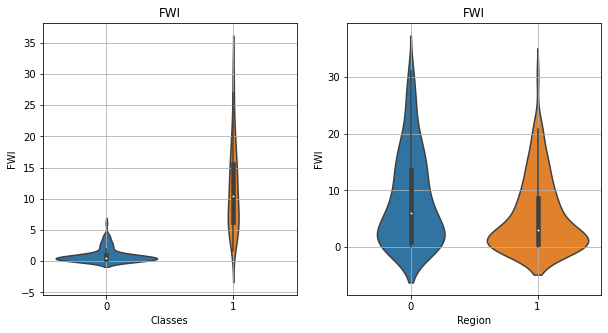

In [66]:
# violinplot for the data

for i in numerical_col:
    plt.figure(figsize=(10,5))
    ax1 = plt.subplot(1,2,1)
    sns.violinplot(data=df1, x='Classes', y=i)
    plt.grid()
    plt.title(i)
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    sns.violinplot(data=df1, x='Region', y=i)
    plt.grid()
    plt.title(i)
    plt.show()

### FacetGrid for the categorical data

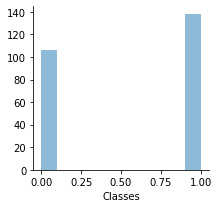

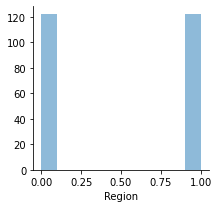

In [52]:
for i, col in enumerate(categorical_col, 1):
    ax = sns.FacetGrid(df1)
    ax.map(plt.hist, col, alpha = 0.5)
    ax.add_legend()

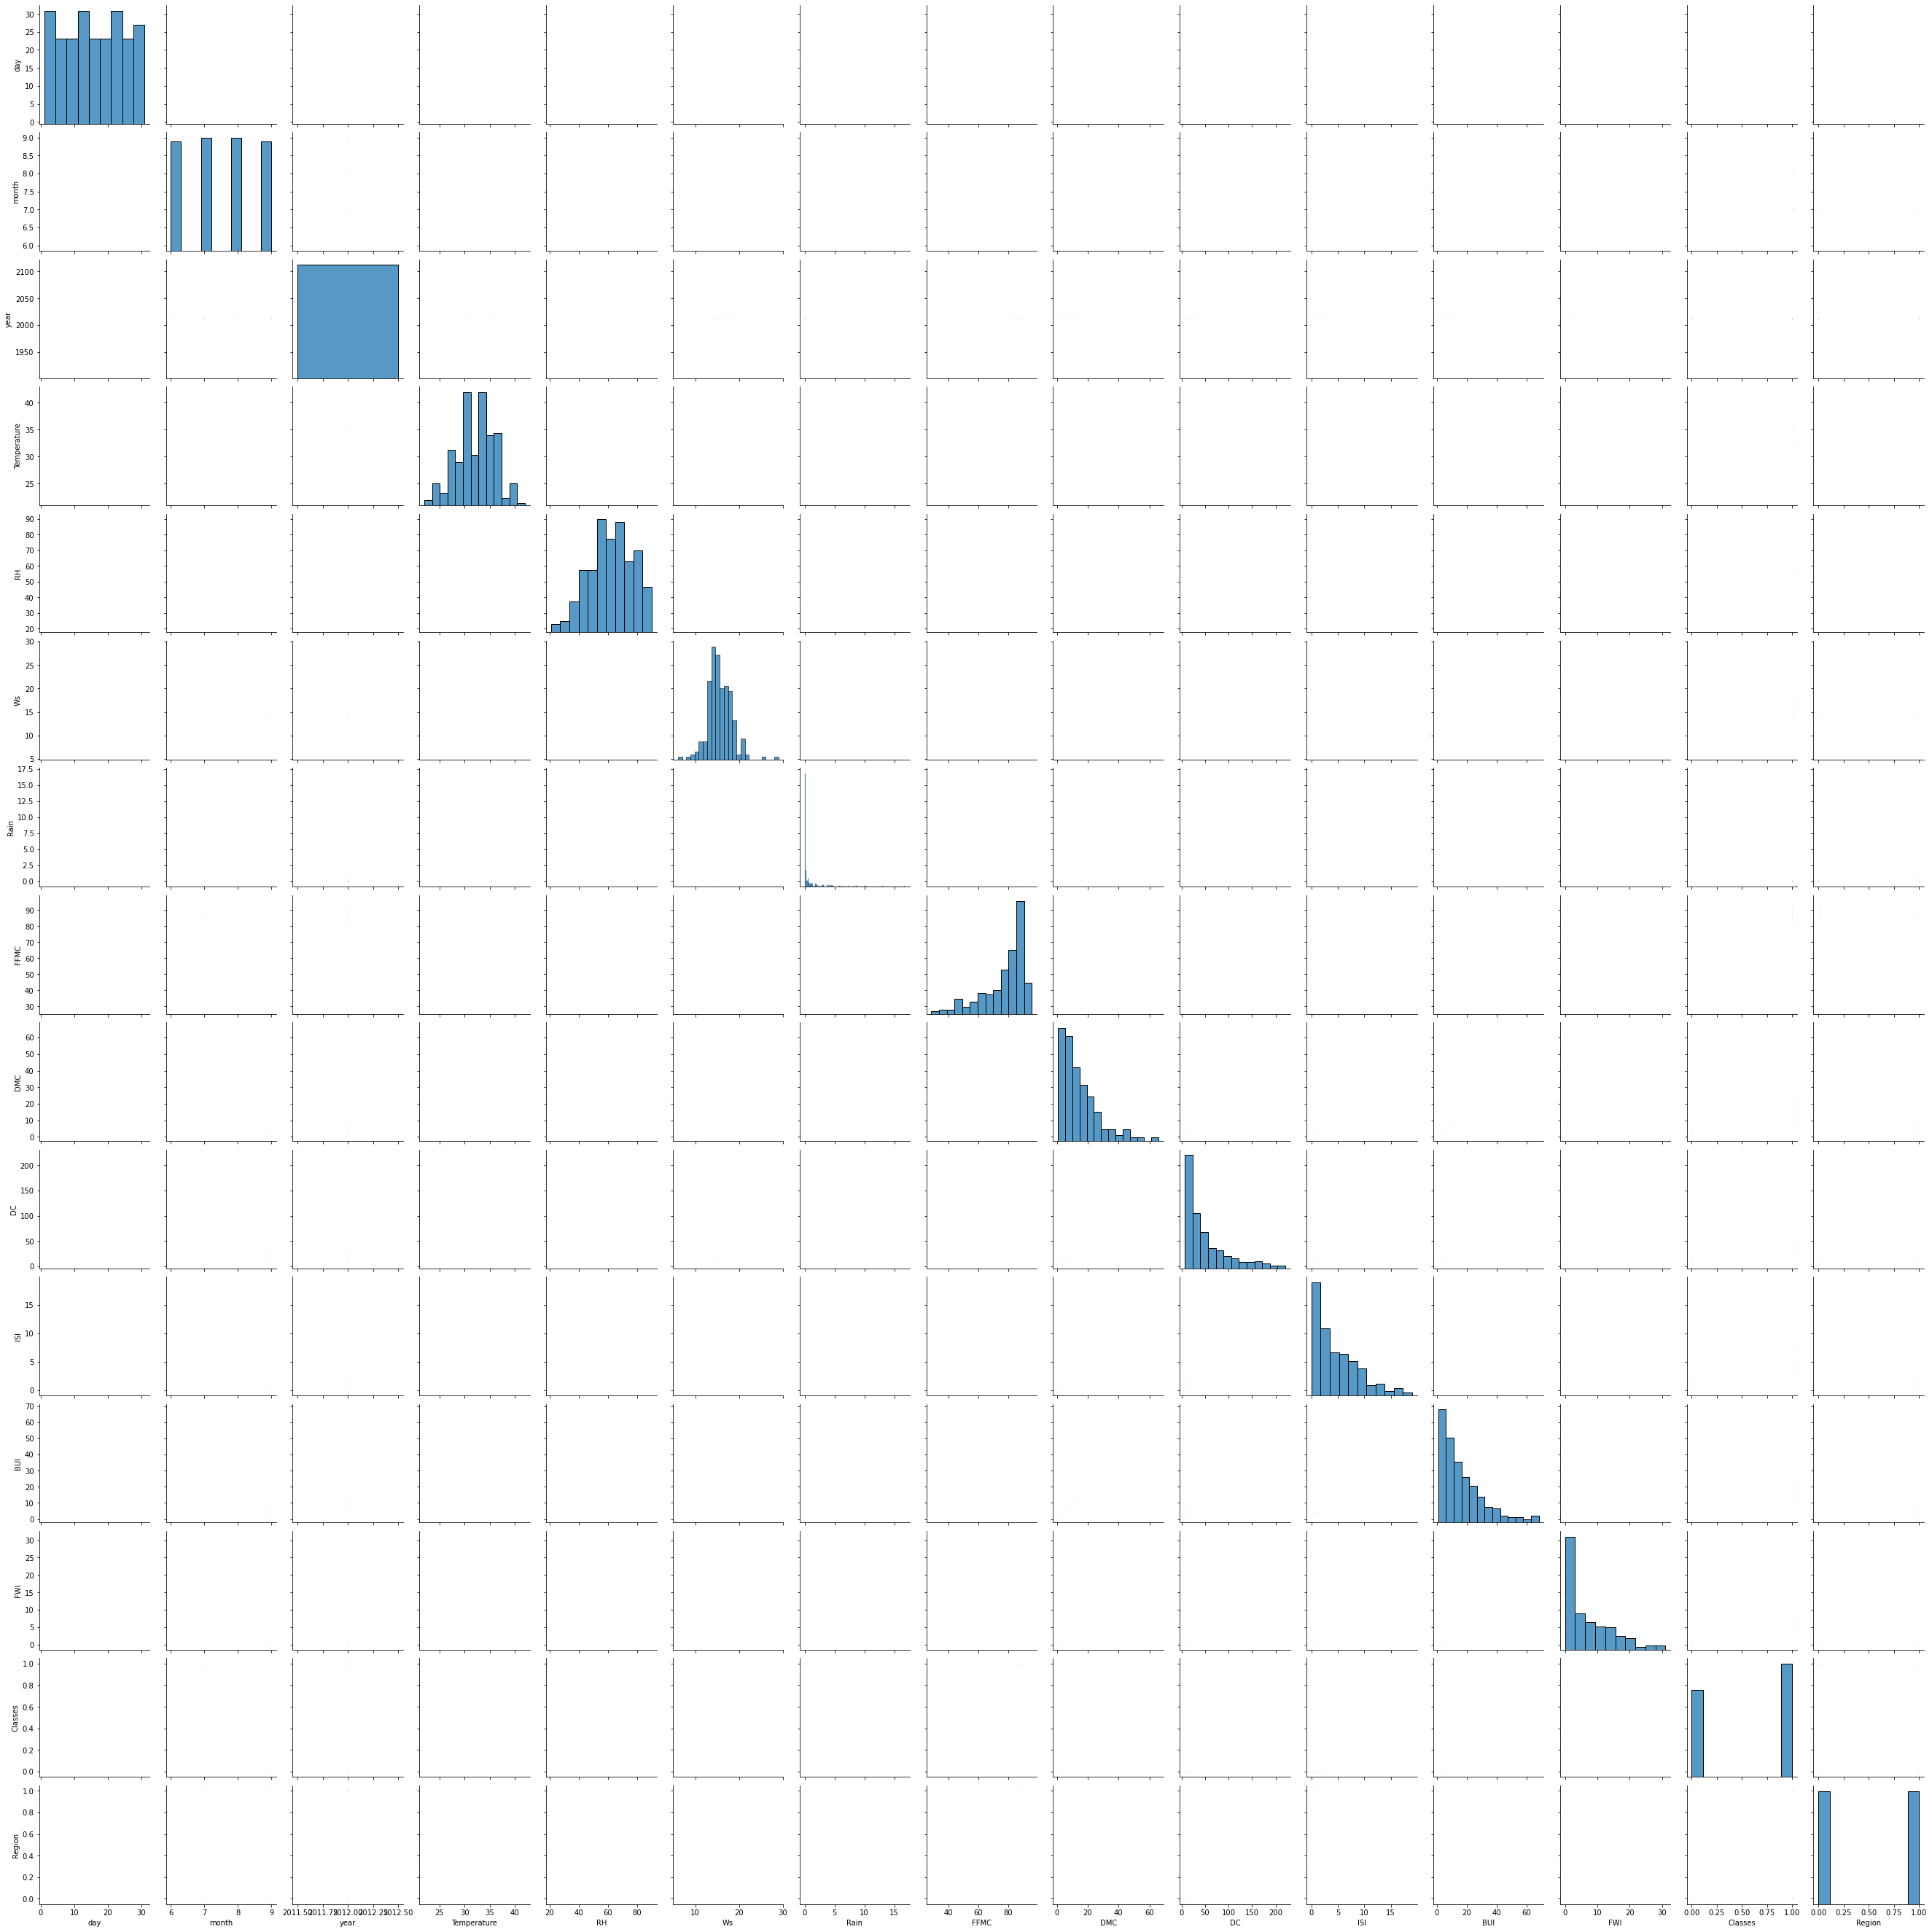

In [53]:
sns.pairplot(df1, kind='scatter',             
             plot_kws={'s' : 1,
                       'alpha' : 0.01})
plt.show()

### Finding Correlation

In [68]:
correlation = df1.corr()
correlation

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350938,0.201784,-4.662229e-16
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.083169,0.022333,6.718556e-17
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.562766,0.518119,-2.734961e-01
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.575292,-0.435023,4.064239e-01
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.031159,-0.066529,1.768290e-01
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323940,-0.379449,4.108006e-02
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.689155,0.770114,-2.246798e-01
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875835,0.584188,-1.910937e-01
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739504,0.507132,8.148217e-02


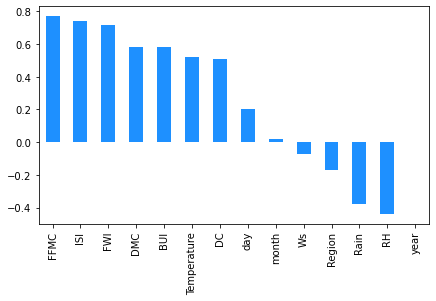

In [69]:
#Correlation Analysis

ax = round(correlation['Classes'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' ,color='dodgerblue' , figsize = (7,4))
plt.show() 

<AxesSubplot:>

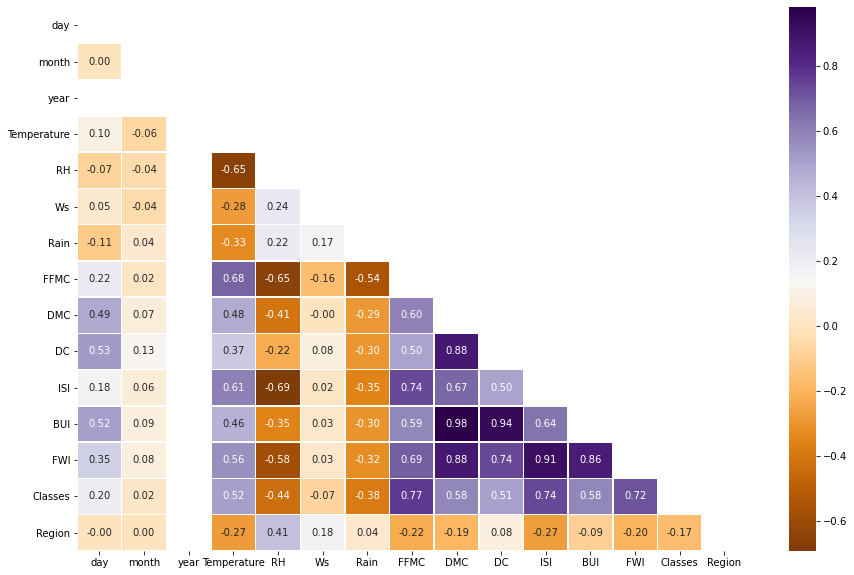

In [97]:
# Using Heatmap Correlation Analysis

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(correlation))
sns.heatmap(correlation,mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

OBSERVATION : 

- Darker shades are represent high correlation.
- BUI-DMC, BUI-DC and FWI-ISI has correlation mare than 0.9
- RH-Temprature, FFMC-RH, ISI-RH has very less correlation i.e - less than 0.6

### For checking in which region and in which month how many days fire has occured
- Region 0 is for Bejaia region
- Region 1 is for Sidi-Bel Abbes region

In [100]:
df1[df1['Classes'] == 1].groupby(['Region', 'month'])[['day']].count()

day
Region month     
0      6       12
       7       24
       8       27
       9       16
1      6       13
       7       15
       8       24
       9        7

<AxesSubplot:xlabel='month', ylabel='count'>

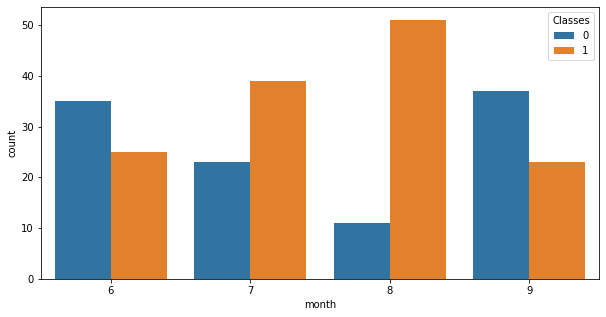

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1, x= 'month', hue='Classes')

OBSERVATION : There is more fire in 7th and 8th month.

### For checking in which region, there are how many fire days has not fire days
- Region 0 is for Bejaia region and  Region 1 is for Sidi-Bel Abbes region
- Classes 1 is for fire and classes 0 is for not fire

In [102]:
df1.groupby(['Region', 'Classes'])[['day']].count()

day
Region Classes     
0      0         43
       1         79
1      0         63
       1         59

<AxesSubplot:xlabel='Region', ylabel='count'>

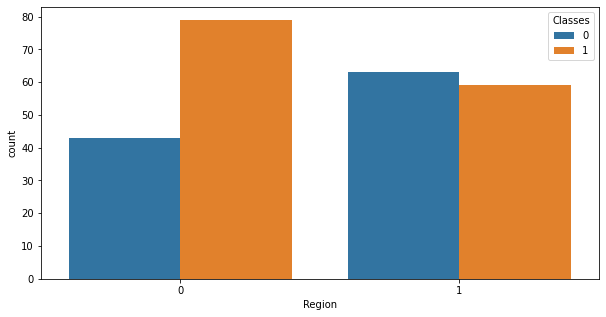

In [103]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1, x= 'Region', hue='Classes')

OBSERVATION : Sidi-Bel Abbes region has more fire as compared to Bejaia region